In [11]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # Для визуализации прямоугольников и трапеций
import pandas as pd


In [12]:
plt.style.use("seaborn-v0_8-whitegrid")


# [-2, 2]
def f(x:float ) -> float:
    return x * np.log(3) - 3**x
analytic_integral = 0
bound_a, bound_b = -2, 2

In [13]:
from typing import Callable
# Helper function to generate partition points for uniform partition
def create_uniform_partition(a:float, b:float, n:int ) -> np.ndarray:
    """Creates points for a uniform partition of [a, b] into n subintervals."""
    # n+1 points create n intervals
    return np.linspace(a, b, n + 1)

def create_incongruent_partition(a: float, b:float, n:int) -> np.ndarray:
    pass

# 1. Left Rectangle Method (Takes partition points x)
def integrate_left_rect(f:Callable[[float], float], x: np.ndarray)-> float:
    """Computes integral using the left rectangle method for a given partition x."""
    # Calculate lengths of subintervals: [x_1-x_0, x_2-x_1, ..., x_n-x_{n-1}]
    delta_x_arr = np.diff(x)
    # Use left endpoints f(x_i-1)
    # x[:-1] are points [x_0, x_1, ..., x_{n-1}]
    integral_sum = np.sum(f(x[:-1]) * delta_x_arr)
    return integral_sum

# 2. Right Rectangle Method (Takes partition points x)
def integrate_right_rect(f:Callable[[float], float], x: np.ndarray)-> float:
    """Computes integral using the right rectangle method for a given partition x."""
    delta_x_arr = np.diff(x)
    # Use right endpoints f(x_i)
    # x[1:] are points [x_1, x_2, ..., x_n]
    integral_sum = np.sum(f(x[1:]) * delta_x_arr)
    return integral_sum

# 3. Midpoint Rectangle Method (Takes partition points x)
def integrate_midpoint_rect(f:Callable[[float], float], x: np.ndarray)-> float:
    """Computes integral using the midpoint rectangle method for a given partition x."""
    delta_x_arr = np.diff(x)
    # Calculate midpoints for each interval [x_i-1, x_i]
    midpoints = (x[:-1] + x[1:]) / 2
    integral_sum = np.sum(f(midpoints) * delta_x_arr)
    return integral_sum

# 4. Trapezoidal Rule (Takes partition points x)
def integrate_trapezoid(f:Callable[[float], float], x: np.ndarray)-> float:
    """Computes integral using the trapezoidal rule for a given partition x."""
    delta_x_arr = np.diff(x)
    # Sum of (f(x_i-1) + f(x_i))/2 for each interval, multiplied by delta_x_i
    integral_sum = np.sum((f(x[:-1]) + f(x[1:])) / 2 * delta_x_arr)
    return integral_sum

# 5. Simpson's Rule (Takes partition points x)
def integrate_simpson(f:Callable[[float], float], x: np.ndarray)-> float:
    """Computes integral using Simpson's rule for a given partition x (based on provided formula)."""
    delta_x_arr = np.diff(x)
    # Calculate midpoints for each interval [x_i-1, x_i]
    midpoints = (x[:-1] + x[1:]) / 2
    # Apply the formula: sum (f(x_i-1) + 4*f(mid_i) + f(x_i)) * delta_x_i / 6
    integral_sum = np.sum((f(x[:-1]) + 4 * f(midpoints) + f(x[1:])) * delta_x_arr / 6)
    return integral_sum

print("Integration methods updated to accept partition points.")

# Example usage with a uniform partition
n_test = 8
x_test = create_uniform_partition(bound_a, bound_b, n_test)
print(f"Example with f1(x)=x^2 on [0, 2], n={n_test}:")
print(f" Left Rect: {integrate_left_rect(f, x_test):.6f}")
print(f" Right Rect: {integrate_right_rect(f, x_test):.6f}")
print(f" Midpoint Rect: {integrate_midpoint_rect(f, x_test):.6f}")
print(f" Trapezoid: {integrate_trapezoid(f, x_test):.6f}")
print(f" Simpson: {integrate_simpson(f, x_test):.6f}")
print(f" Analytic: {analytic_integral:.6f}")

Integration methods updated to accept partition points.
Example with f1(x)=x^2 on [0, 2], n=8:
 Left Rect: -7.169836
 Right Rect: -9.417056
 Midpoint Rect: -7.990180
 Trapezoid: -8.293446
 Simpson: -8.091269
 Analytic: 0.000000



--- Plotting subplots for f1(x) = x^2 on [0, 2] ---


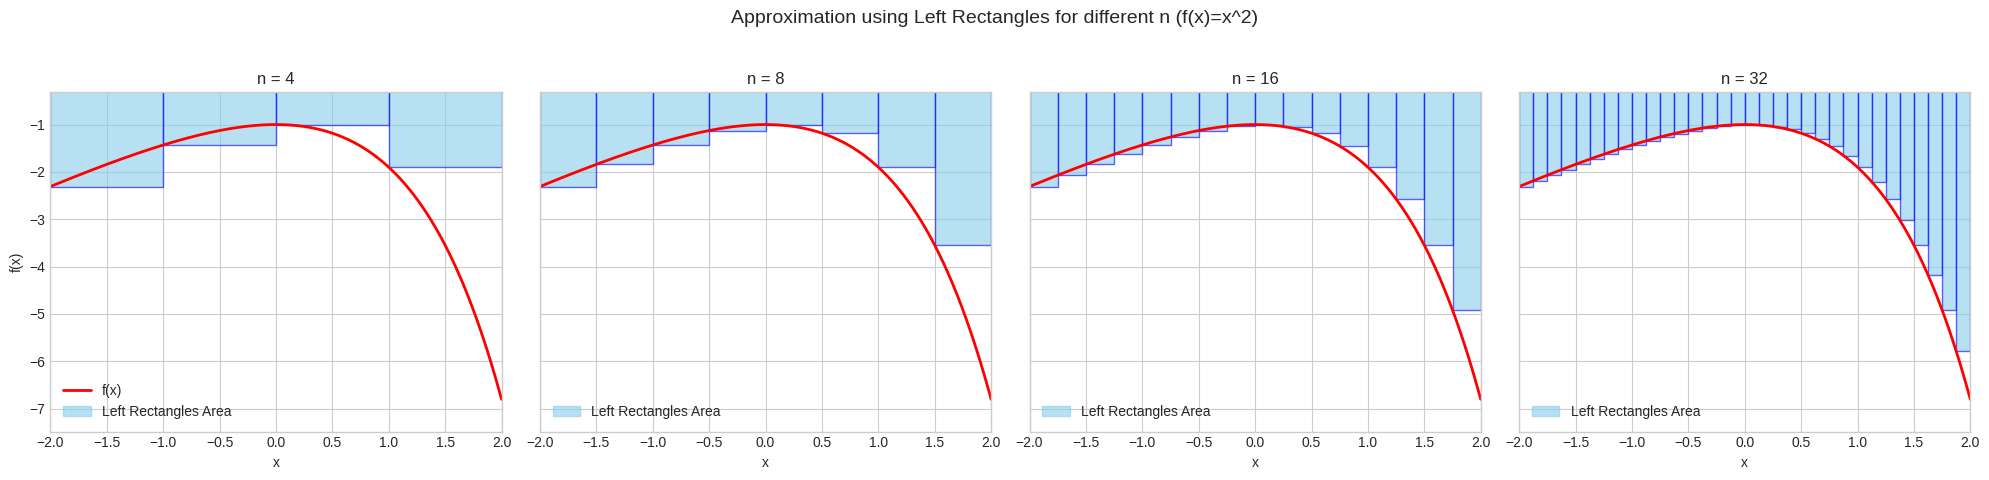

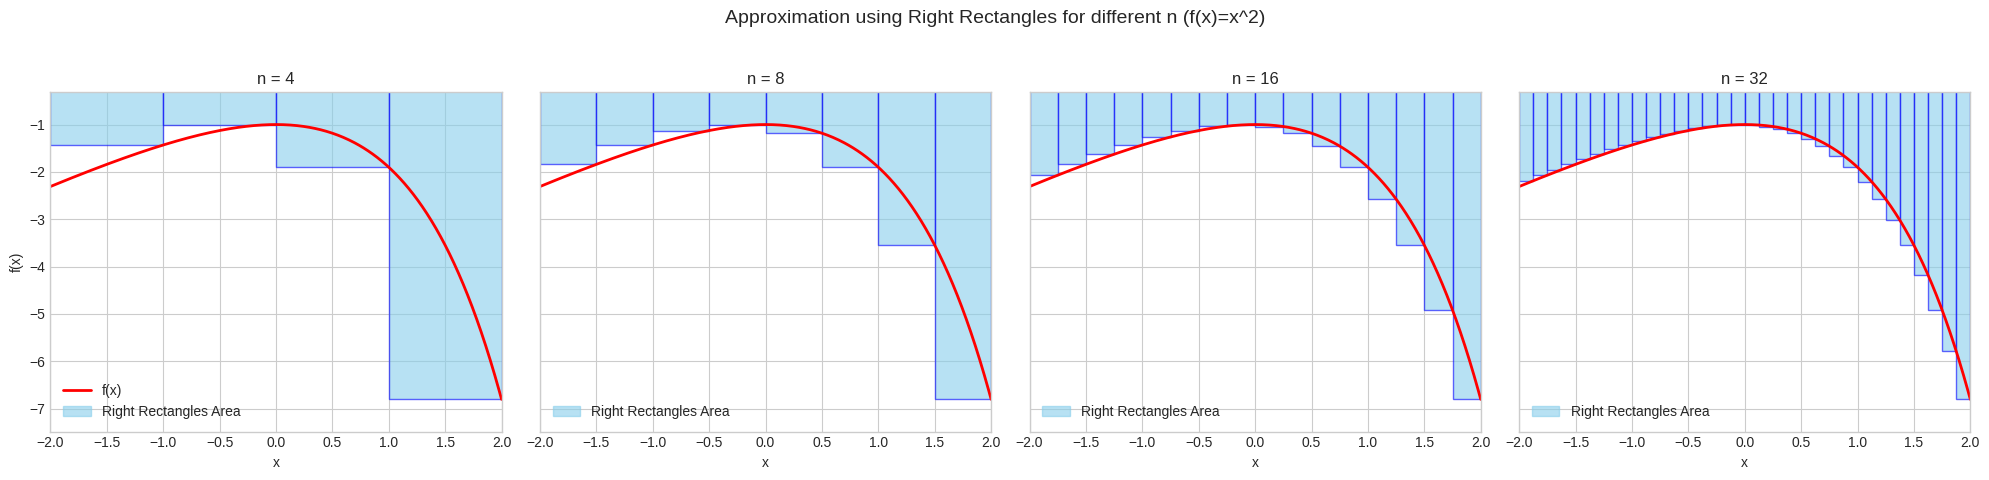

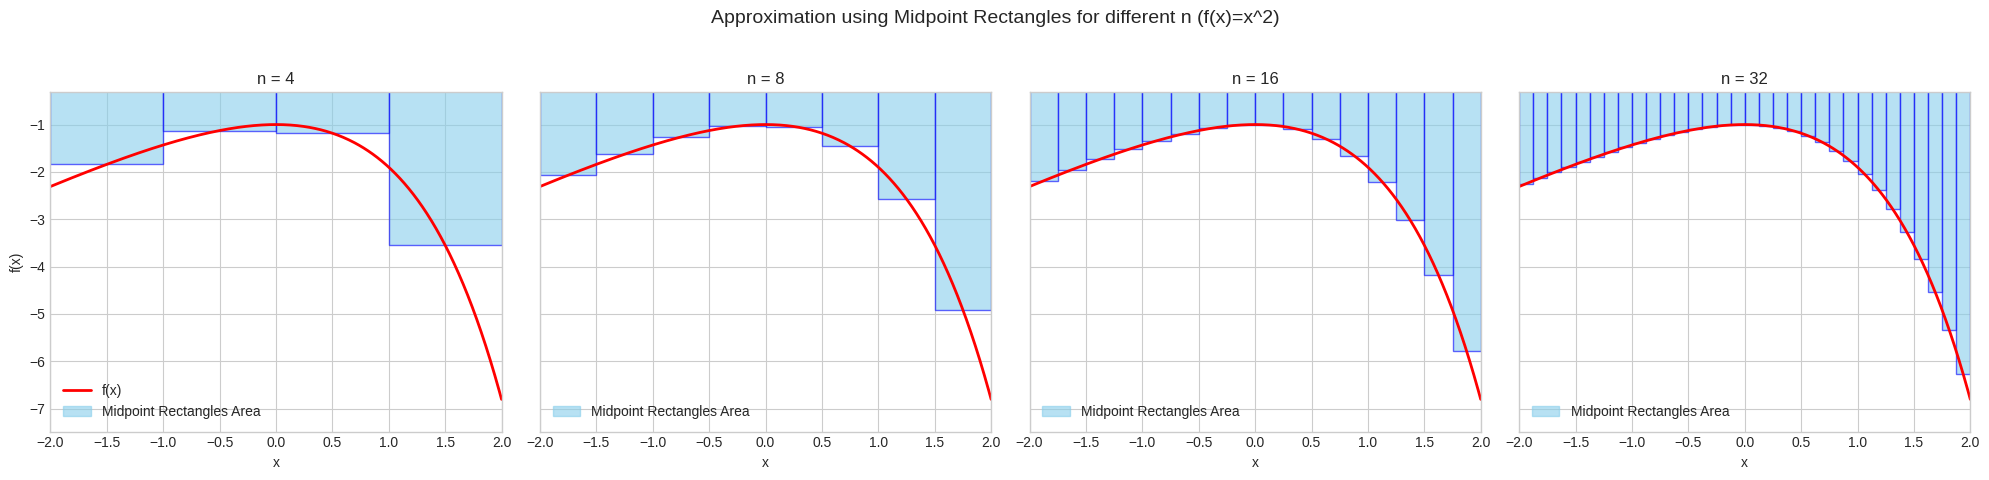

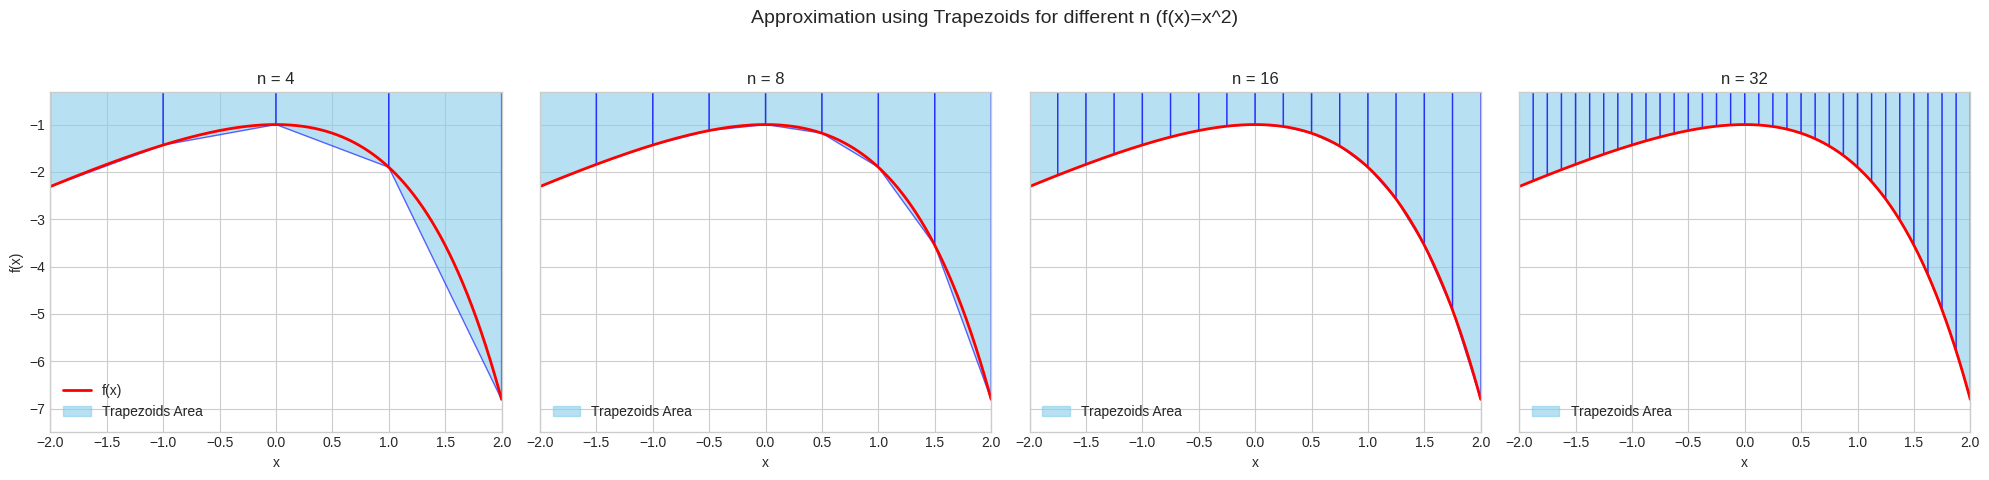

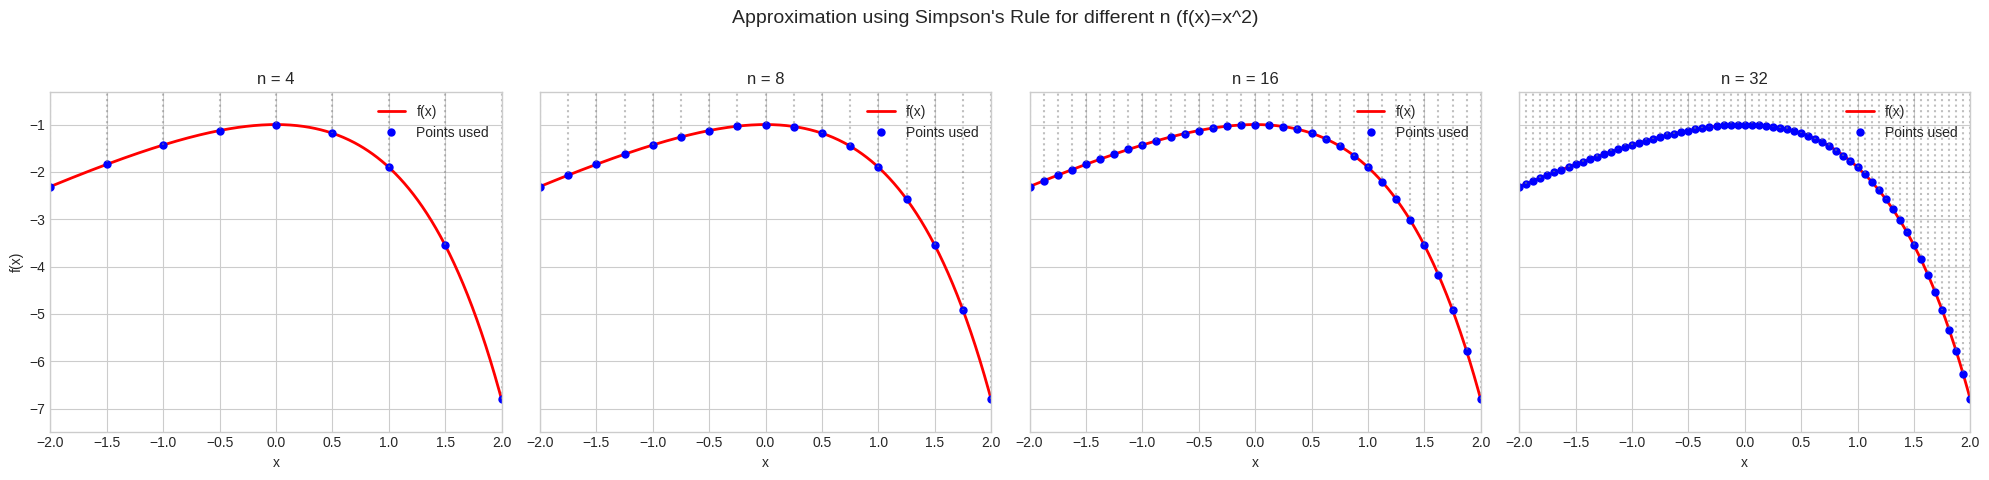

In [14]:
# New function to plot method approximations for different n values in subplots
def plot_method_subplots(f: Callable[[float], float], a:float , b:float, n_values:int, method_name:str, title_suffix:str=""):
    """
    Plots the function and the area approximation for different n values
    using a given method in separate subplots within a single figure.

    Args:
        f: The function to integrate.
        a: The start of the interval.
        b: The end of the interval.
        n_values: A list of n values to plot (e.g., [4, 8, 16]).
        method_name: Name of the integration method (for title/legend).
        title_suffix: Optional suffix for the plot title.
    """
    num_subplots = len(n_values)
    fig, axes = plt.subplots(
        1, num_subplots, figsize=(5 * num_subplots, 5), sharey=True
    )  # 1 row, num_subplots columns, shared y-axis

    # Ensure axes is an array even if num_subplots is 1
    if num_subplots == 1:
        axes = [axes]

    # Generate points for smooth function plot (same for all subplots)
    x_smooth = np.linspace(a, b, 400)
    y_smooth = f(x_smooth)

    # Determine overall y-limits for shared axis
    y_min_overall, y_max_overall = np.min(y_smooth), np.max(y_smooth)
    y_limit_margin = max(abs(y_min_overall), abs(y_max_overall)) * 0.1
    y_lower_limit = min(0, y_min_overall - y_limit_margin)
    y_upper_limit = y_max_overall + y_limit_margin

    for i, n in enumerate(n_values):
        ax = axes[i]  # Select the current subplot axes

        x_partition = create_uniform_partition(a, b, n)
        delta_x_arr = np.diff(x_partition)

        # Plot the smooth function
        ax.plot(x_smooth, y_smooth, "r-", linewidth=2, label=f"f(x)")

        # Plotting the approximation area based on the method
        if method_name == "Left Rectangles":
            y_heights = f(x_partition[:-1])
            for j in range(n):
                rect = patches.Rectangle(
                    (x_partition[j], 0),
                    delta_x_arr[j],
                    y_heights[j],
                    linewidth=1,
                    edgecolor="b",
                    facecolor="skyblue",
                    alpha=0.6,
                )
                ax.add_patch(rect)
        elif method_name == "Right Rectangles":
            y_heights = f(x_partition[1:])
            for j in range(n):
                rect = patches.Rectangle(
                    (x_partition[j], 0),
                    delta_x_arr[j],
                    y_heights[j],
                    linewidth=1,
                    edgecolor="b",
                    facecolor="skyblue",
                    alpha=0.6,
                )
                ax.add_patch(rect)
        elif method_name == "Midpoint Rectangles":
            midpoints = (x_partition[:-1] + x_partition[1:]) / 2
            y_heights = f(midpoints)
            for j in range(n):
                rect = patches.Rectangle(
                    (x_partition[j], 0),
                    delta_x_arr[j],
                    y_heights[j],
                    linewidth=1,
                    edgecolor="b",
                    facecolor="skyblue",
                    alpha=0.6,
                )
                ax.add_patch(rect)
        elif method_name == "Trapezoids":
            x_trap = x_partition
            y_trap = f(x_trap)
            for j in range(n):
                verts = [
                    (x_trap[j], 0),
                    (x_trap[j + 1], 0),
                    (x_trap[j + 1], y_trap[j + 1]),
                    (x_trap[j], y_trap[j]),
                ]
                poly = patches.Polygon(
                    verts,
                    closed=True,
                    linewidth=1,
                    edgecolor="b",
                    facecolor="skyblue",
                    alpha=0.6,
                )
                ax.add_patch(poly)
        elif method_name == "Simpson's Rule":
            # For Simpson, we plot the points used and maybe vertical lines, area fill is complex
            midpoints = (x_partition[:-1] + x_partition[1:]) / 2
            all_points_x = np.sort(np.concatenate([x_partition, midpoints]))
            all_points_y = f(all_points_x)
            ax.plot(all_points_x, all_points_y, "bo", markersize=5, label="Points used")
            # Optionally, draw vertical lines from points to x-axis
            ax.vlines(
                all_points_x,
                0,
                all_points_y,
                color="gray",
                linestyle="dotted",
                alpha=0.5,
            )
            ax.legend()  # Add legend here for Simpson points

        # Add title for the subplot
        ax.set_title(f"n = {n}")
        ax.set_xlabel("x")
        if i == 0:  # Only add ylabel to the first subplot
            ax.set_ylabel("f(x)")
        ax.set_xlim([a, b])
        ax.set_ylim([y_lower_limit, y_upper_limit])  # Apply shared y-limits
        ax.grid(True)

        # Add legend for methods other than Simpson
        if method_name != "Simpson's Rule":
            # Create a proxy artist for the legend entry of the shaded area
            proxy_patch = patches.Patch(
                color="skyblue", alpha=0.6, label=f"{method_name} Area"
            )
            handles, labels = ax.get_legend_handles_labels()
            # Ensure we only add the function label once per figure (handled by sharey=True)
            if i == 0:
                ax.legend(
                    handles=[handles[0], proxy_patch],
                    labels=[labels[0], proxy_patch.get_label()],
                )
            else:
                ax.legend(handles=[proxy_patch], labels=[proxy_patch.get_label()])

    # Add a main title for the entire figure
    fig.suptitle(
        f"Approximation using {method_name} for different n {title_suffix}", fontsize=14
    )
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
    plt.show()


# --- Generate Subplots for n = 4, 8, 16 ---

n_values_to_plot = [4, 8, 16, 32]


# Function 1: f1(x) = x^2 on [0, 2]
a1, b1 = -2, 2
print("\n--- Plotting subplots for f1(x) = x^2 on [0, 2] ---")
plot_method_subplots(
    f, a1, b1, n_values_to_plot, "Left Rectangles", title_suffix="(f(x)=x^2)"
)
plot_method_subplots(
    f, a1, b1, n_values_to_plot, "Right Rectangles", title_suffix="(f(x)=x^2)"
)
plot_method_subplots(
    f, a1, b1, n_values_to_plot, "Midpoint Rectangles", title_suffix="(f(x)=x^2)"
)
plot_method_subplots(
    f, a1, b1, n_values_to_plot, "Trapezoids", title_suffix="(f(x)=x^2)"
)
plot_method_subplots(
    f, a1, b1, n_values_to_plot, "Simpson's Rule", title_suffix="(f(x)=x^2)"
)



Errors for f1(x)=x^2:


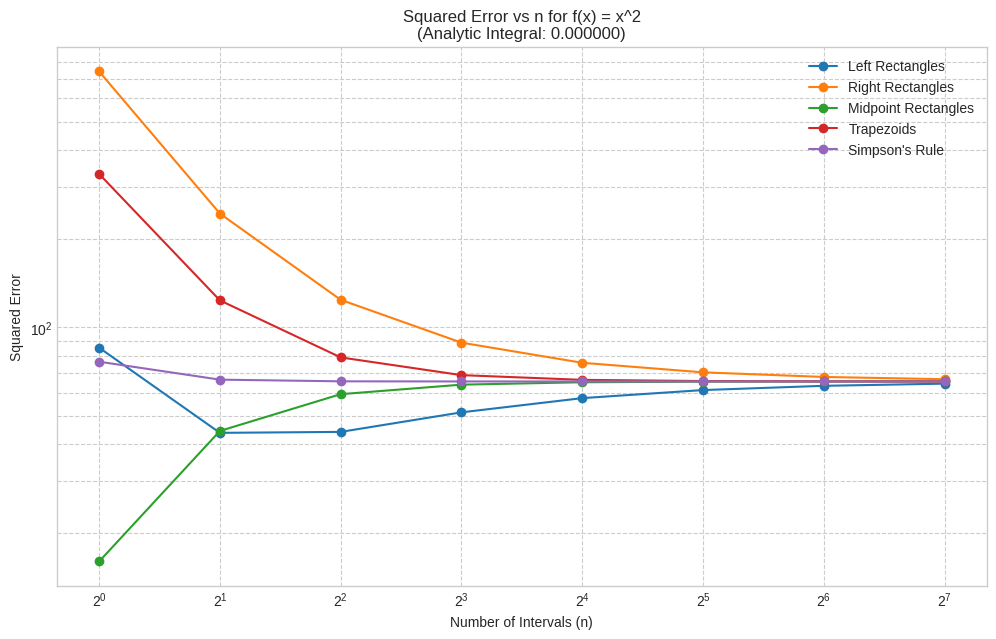

In [15]:
# --- Computations and Error Analysis for n = 1, 2, 4, ..., 128 ---

# Define the range of n values for error analysis
n_values_for_error = [2**k for k in range(8)]  # 1, 2, 4, 8, 16, 32, 64, 128

# Dictionary of integration methods
integration_methods = {
    "Left Rectangles": integrate_left_rect,
    "Right Rectangles": integrate_right_rect,
    "Midpoint Rectangles": integrate_midpoint_rect,
    "Trapezoids": integrate_trapezoid,
    "Simpson's Rule": integrate_simpson,
}


def calculate_errors(f: Callable[[float], float], a: float, b: float, analytic_integral:float, n_values: int, methods: str) -> pd.DataFrame:
    """
    Calculates numerical integrals and errors for different methods and n values.

    Args:
        f: The function to integrate.
        a: The start of the interval.
        b: The end of the interval.
        analytic_integral: The true value of the integral.
        n_values: A list of n values.
        methods: A dictionary of method names and functions.

    Returns:
        A pandas DataFrame with columns: 'n', 'Method', 'Numerical Result', 'Absolute Error', 'Squared Error'.
    """
    results = []
    for n in n_values:
        x_partition = create_uniform_partition(a, b, n)
        for method_name, method_func in methods.items():
            numerical_result = method_func(f, x_partition)
            absolute_error = abs(numerical_result - analytic_integral)
            squared_error = (numerical_result - analytic_integral) ** 2
            results.append(
                {
                    "n": n,
                    "Method": method_name,
                    "Numerical Result": numerical_result,
                    "Absolute Error": absolute_error,
                    "Squared Error": squared_error,
                }
            )
    return pd.DataFrame(results)


def plot_errors(
    error_df: pd.DataFrame, analytic_integral:float, function_name: str, error_type: str="Absolute Error"
):
    """
    Plots the error vs n for different integration methods.

    Args:
        error_df: DataFrame containing error data.
        analytic_integral: The true value of the integral (for title).
        function_name: Name of the function (for title).
        error_type: Type of error to plot ('Absolute Error' or 'Squared Error').
    """
    plt.figure(figsize=(12, 7))

    # Plot error for each method
    for method_name in error_df["Method"].unique():
        method_data = error_df[error_df["Method"] == method_name]
        plt.plot(
            method_data["n"],
            method_data[error_type],
            marker="o",
            linestyle="-",
            label=method_name,
        )

    plt.xscale("log", base=2)  # Use log scale for n (powers of 2)
    plt.yscale("log")  # Use log scale for error to see convergence rates

    plt.xlabel("Number of Intervals (n)")
    plt.ylabel(error_type)
    plt.title(
        f"{error_type} vs n for {function_name}\n(Analytic Integral: {analytic_integral:.6f})"
    )
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()


# --- Perform calculations and plot errors for each function ---

# Function 1: f1(x) = x^2 on [0, 2]
errors_f1 = calculate_errors(
    f, a1, b1, analytic_integral, n_values_for_error, integration_methods
)
print("Errors for f1(x)=x^2:")
# plot_errors(errors_f1, analytic_integral_f1, "f(x) = x^2", error_type="Absolute Error") #same
plot_errors(errors_f1, analytic_integral, "f(x) = x^2", error_type="Squared Error")
